In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

https://www.juntadeandalucia.es/organismos/saludyfamilias/actualidad/noticias.html

In [2]:
filename = 'covid19-es-and.csv'
fecha = '01/05/2020'
url = 'https://www.juntadeandalucia.es/organismos/saludyfamilias/actualidad/noticias/detalle/235346.html'

In [3]:
# Load
tables = pd.read_html(url, header=0, thousands='.')
assert len(tables) > 0
dfL = tables[0]

In [4]:
# Prepare
dfL.set_index(['Provincia'], inplace=True)
del dfL['Positivo']
del dfL['UCI']
dfL.rename(columns={'Hospitalización': 'Ingresados', 'Curados': 'Altas', 'Fallecimientos': 'Bajas'}, inplace=True)
dfL['Fecha'] = fecha
dfL

,Ingresados,Bajas,Altas,Fecha
Provincia,,,,
Almería,207,48,336,01/05/2020
Cádiz,541,132,360,01/05/2020
Córdoba,533,99,861,01/05/2020
Granada,1144,244,1567,01/05/2020
Huelva,220,43,196,01/05/2020
Jaén,719,161,559,01/05/2020
Málaga,1415,259,1498,01/05/2020
Sevilla,1157,252,957,01/05/2020
Total,5936,1238,6334,01/05/2020


In [5]:
# Save to csv
campos_ordenados = ['Ingresados', 'Altas', 'Bajas', 'Fecha']
dfL[campos_ordenados].to_csv(filename, encoding='utf-8', header=False, mode='+a', index_label='Provincia')

In [6]:
# Load full csv
df = pd.read_csv(filename, thousands='.')

In [7]:
# Prepare
df['Fecha'] = pd.to_datetime(df['Fecha'], dayfirst=True)
last_fecha = df['Fecha'].max()
df.set_index(['Provincia', 'Fecha'], inplace=True)
df.sort_index(inplace=True)

In [8]:
# Variaciones con respecto al día anterior
dfV = df.groupby(level='Provincia').pct_change() * 100
dfV.tail()

Ingresados      Altas     Bajas
Provincia Fecha                                      
Total     2020-04-27    0.347947   3.142797  1.048035
          2020-04-28    0.433426   3.047035  0.950735
          2020-04-29    0.673226   4.623933  1.712329
          2020-04-30    0.720165   8.308042  1.599327
          2020-05-01    1.055499  10.928196  2.568351

In [9]:
# Para seleccionar todas las filas de una o varias fechas hay que usar un trick ya que : no se puede usar en este caso
dfG = dfV.loc[(slice(None), [last_fecha]), :]

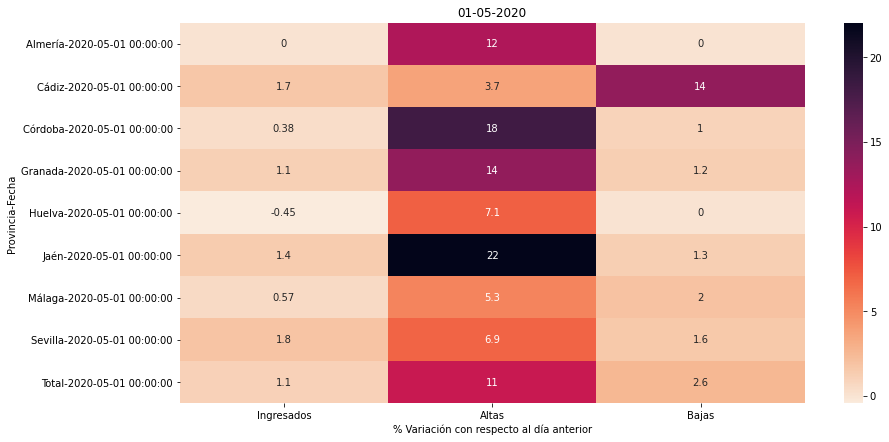

In [10]:
# Set the width and height of the figure
plt.figure(figsize=(14,7))

# Add title
plt.title(last_fecha.strftime('%d-%m-%Y'))

# Invertir los colores
cmap = sns.cm.rocket_r

# Heatmap 
sns.heatmap(data=dfG, annot=True, cmap=cmap)

# Add label for horizontal axis
plt.xlabel('% Variación con respecto al día anterior')
plt.show()

In [11]:
provincia = 'Huelva'
dias = 10
data = df.loc[provincia][['Ingresados', 'Altas', 'Bajas']].diff().tail(dias).copy()
titulo = 'Nuevos casos en los últimos ' + str(dias) + ' días en ' + provincia
# Correcciones
# El día 25/04/2020 el número de personas ingresadas calculado es negativo.
# Al ser datos acumulados lo que indica es una corrección en el número de ingresados acumulados a ese día
data.loc['2020-04-25']['Ingresados'] = 0

In [12]:
print(titulo)
print(data)

Nuevos casos en los últimos 10 días en Huelva
            Ingresados  Altas  Bajas
Fecha                               
2020-04-22         0.0    0.0    1.0
2020-04-23         2.0    6.0    0.0
2020-04-24         2.0    2.0    2.0
2020-04-25         0.0   12.0    2.0
2020-04-26         1.0    2.0    1.0
2020-04-27         1.0    1.0    0.0
2020-04-28         3.0    1.0    0.0
2020-04-29         0.0    9.0    1.0
2020-04-30         7.0   20.0    2.0
2020-05-01        -1.0   13.0    0.0


Nuevos casos en los últimos 10 días en Huelva. (Nuevos ingresos hospitalarios)


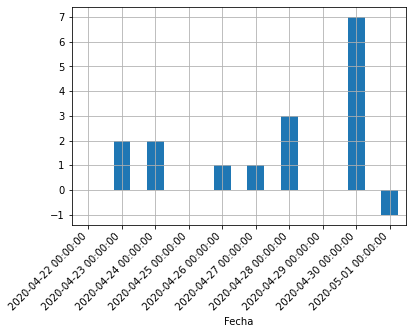

In [13]:
print(titulo + '. (Nuevos ingresos hospitalarios)')
data['Ingresados'].plot(kind='bar', grid=True)
plt.xticks(
    rotation=45,    
    horizontalalignment='right',
    fontweight='light',
)
plt.show()